#Práctico 4 - Técnicas de clasificación con SKLearn

Dados los siguientes dataset utilizados en los prácticos 2.a y 2.b:

Palmer Penguins Dataset (OpenML id 43347 : https://www.openml.org/d/43347/)

Spam en mensajes de texto (adjunto, versión en jsons)


Resolver para cada dataset los siguiente puntos:


a) Definir cuál es el objetivo de aplicar técnicas de clasificación.

b) En caso de ser necesario, definir qué pre‐procesamiento se realizará a los datos. Justificar.

d) Obtener dos clasificadores utilizando la librería Scikit learn. Para ello elegir 2 técnicas de clasificación, configurar los clasificadores, y ejecutar los algoritmos. Justificar las decisiones tomadas.

e) Evaluar los dos clasificadores y compararlos, indicando cual de los dos recomendaría.

f) Explicar un ejemplo de cómo los clasificadores obtenidos pueden ser usados en el futuro en una aplicación real.

ALUMNO: Martino Ferrero

NOTA: LAS RESPUESTAS SE ENCUENTRAN DISTRIBUIDAS EN EL CÓDIGO DEPENDIENDO DE A QUÉ ESTÁN ASOCIADAS

a) El objetivo de aplicar técnicas de clasificación es poder predecir a cuál o cuáles clases se corresponde una nueva entrada de datos en un problema dado (en un caso de un problema multiclase pueden ser varias), a partir del aprendizaje de un dataset de entradas etiquetadas para el mismo problema (en otras palabras con su clase real definida, o sea el ground truth). De este modo, se pueden utilizar una gran variedad de técnicas, como algoritmos estáticos sin adaptación a nuevos ejemplos, otros que sí lo hacen o aprendizaje profundo a través de redes neuronales.

Puntualmente en este caso el problema claramente es de clasificación ya que el objetivo será poder predecir si los mensajes son o no de spam, que será la clase objetivo o también llamada target del problema en cuestión. Esto es esencial por ejemplo para un sistema de filtrado de correo electrónico, que debe predecir con un alto grado de certeza si el correo es o no de spam. La gran importancia de radica en que lógicamente existen dos posibles situaciones de error en este caso con las siguientes implicancias:

- *Un correo que era spam se clasifica como no spam (falso negativo)* : Una de las grandes implicancias que tiene este caso se asocia a los problemas de seguridad que puede haber, porque muchas veces los correos de spam poseen  phishing o malware (especialmente peligroso para las empresas, pero también par los usuarios en sí mismos). Por otra parte se vuelve sumamente tedioso e improductivo para el usuario ya que estos correos le "ensucian" la bandeja de entrada, en algunos casos en grandes cantidades. Esto es muy costoso de limpiar manualmente.

- *Un correo que no era spam se clasifica como spam (falso positivo)* : Uno de los mayores problemas de esta posible situación es que quizás un correo que no era spam pero fue clasificado como tal, tenía información relevante, avisos, propuestas laborales, entre otros. Lógicamente el hecho de que se pierdan correos enviándolos a otro lado por ser spam, puede provocar pérdidas importantes de tiempo en procesos o flujos de trabajo. Por su naturaleza, este problema suele ser un poco más grave que el otro, aunque en sí esto es relativo y dependiente del contexto.

Los dos casos mencionados dan a la idea de lo fundamental que es que la clasificación del spam sea lo más precisa posible.

# **Instalación de ydata-profiling para el análisis**

In [ ]:
! pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=662fa5e8afd41bf0b49c647908ac54b018ce36d657667f82b8591cc9f2fadfcd
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


# **Descargar el dataset**

In [ ]:
from google.colab import drive
import pandas as pd
# Montamos la unidad de Google Drive (solicitará autorización)
drive.mount('/content/gdrive', force_remount=True)

# Copia el zip al entorno de ejecución y los descomprime
zip_path = "/content/gdrive/My Drive/DUIA/jsons-spam.zip"
!cp "{zip_path}" .
!unzip -q jsons-spam.zip

!ls

Mounted at /content/gdrive
gdrive	jsons-spam  jsons-spam.zip  sample_data


In [ ]:
import glob # El modulo glob permite buscar todos los pathnames que machean con un patrón espécifico de acuerdo a las reglas de la shell de UNIX
import json

# Busca los archivos json en el directorio jsons-spam
file_path = glob.glob("/content/jsons-spam/*.json")
v2 = []
v1 = []

# Lee cada archivo y carga la información en las listas X e y
for file in file_path:
    with open(file, 'r') as j:
      json_data = json.load(j) # Carga el json
    v2.append(json_data['v2'])
    v1.append(json_data['v1'])

print(v2)
print(v1)

['It just seems like weird timing that the night that all you and g want is for me to come smoke is the same day as when a shitstorm is attributed to me always coming over and making everyone smoke', "Ya, i'm referin to mei's ex wat... No ah, waitin 4 u to treat, somebody shld b rich liao...So gd, den u dun have to work frm tmr onwards...", 'I might come to kerala for 2 days.so you can be prepared to take a leave once i finalise .dont plan any travel during my visit.need to finish urgent works.', 'Where are you ? You said you would be here when I woke ... :-(', 'Ok. No wahala. Just remember that a friend in need ...', 'Ok.ok ok..then..whats ur todays plan', "What's up. Do you want me to come online?", 'O i played smash bros  &lt;#&gt;  religiously.', 'Pls clarify back if an open return ticket that i have can be preponed for me to go back to kerala.', 'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a тБ1500 Bonus Prize,

In [ ]:
import pandas as pd

messages_df = pd.DataFrame({ # se crea un dataframe con las v1 y v2 obtenidas, renombrando el v1 o target a "type" (que puede ser "spam" o "ham"), y el v2 a "text" que es el cuerpo en sí del mensaje
    'type': v1,
    'text': v2
})

print("Tamaño del dataset: {}".format(len(messages_df)))
print(messages_df.head())

Tamaño del dataset: 5572
  type                                               text
0  ham  It just seems like weird timing that the night...
1  ham  Ya, i'm referin to mei's ex wat... No ah, wait...
2  ham  I might come to kerala for 2 days.so you can b...
3  ham  Where are you ? You said you would be here whe...
4  ham  Ok. No wahala. Just remember that a friend in ...


# **Informe del conjunto de datos**

Se obtiene un análisis detallado a través de un ProfileReport de ydata_profiling que permite conocer información a detalle del dataset. Algunos puntos interesantes a tener en cuenta al ver este reporte son:

- Hay una cantidad mucho mayor de entradas de ham que de spam (4825 contra 747). Esto implica que será crucial llevar a cabo una buena estratificación de los datos para el entrenamiento con splitting en subset de entrenamiento y de testing, ya que de lo contrario hay bastantes probabilidades de que el modelo sea entrenado y testeado con una cantidad razonable de datos para cada clase de acuerdo al problema original (si bien técnicamente las probabilidades son acordes a su distribución original como también pasarían si fueran 50% y 50%, el principal problema es que en este caso un desbalance puede dejar realmente pocos datos para aprender para una de las clases, y demasiados para la otra, por lo que el impacto de desbalanceo puede ser peor).

- Hay muchas entradas en el dataset duplicadas. Si algunos de estos fueran por errores del sistema puede ser un problema ya que se ocupa espacio extra y, dependiendo el algoritmo, puede tener implicancias más o menos graves de overfitting. Esta información redundante a su vez incrementaría el costo computacional de manera innecesaria. Sin embargo, era de esperarse que puedan pasar cosas así ya que a veces los mensajes que no son de spam y alguien envía, pueden ser tan simples que tal vez tengan repetidos, y en el caso del spam aún más, ya que como generalmente son generados automáticamente, no es para nada raro que se repitan. En ese caso no se deben eliminar, ya que para la mayoría de los algoritmos esto lo que hace es reforzarle la idea de que se trata de un mensaje con features implícitas muy representativas de ese problema.

- No hay entradas con datos faltantes, lo que quita la necesidad de tener que aplicar alguna clase de tratamiento para esos casos.

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(messages_df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 2/2 [00:00<00:00,  2.18it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Tareas de preprocesamiento, entrenamiento, predicción y evaluación

b)

- En este caso no se aplica ya que no se cuenta con la información necesaria, pero si se pudiera saber cuáles de las entradas repetidas se dan por un error del sistema que los envía más de una vez, primero que nada se podrían eliminar las entradas duplicadas del dataset en general (se aplica tanto sobre los textos como sobre su clase asociada). Esto se hace por los problemas con overfitting, memoria y costos computacionales ya mencionados durante el análisis.

- Luego, una vez separado el dataset en entrenamiento y testing, se codifican las etiquetas de clase a fin de llevarlas a valores numéricos que suelen ser preferibles para los algoritmos de aprendizaje.

- Se prosigue con la eliminación de caracteres irrelevantes, de puntuación y dígitos, ahora solo sobre el conjunto de textos.

- Se lleva a cabo la tokenización para traducir en un token cada "palabra" en cada texto.

- Se aplica stemming sobre aquellas entradas que solo contienen caracteres alfanuméricos y que no son stop words (estas últimas son palabras muy generales que no aportan información al problema).

- Se queda con todos aquellos grupos de tokens con 2 o más ocurrencias para evitar incluir términos irrelevantes (puede que en el camino se pierdan algunos relevantes que aparecían una sola vez).

d) Se elegirán los siguientes algoritmos:

- Multinomial Naive Bayes (NB): Debido a su gran rendimiento para la clasificación de textos simples donde no se busca un significado muy profundo en los datos (de lo contrario sería muy malo porque asume independencia entre las palabras y esto en general no es así, hay mucha relación entre las palabras en un texto). Ya que en este caso solo se busca saber si es un mensaje de spam o no, no pareciera repercutir tanto la interdependencia entre las palabras, a diferencia por ejemplo de un clasificador de emociones por texto. Aparte no es muy costoso de entrenar.

- Support Vector Machine (SVM): Debido a ser robusto contra el overfitting y tener una gran funcionamiento con TF-IDF que es acorde al preprocesamiento efectuado.

- También se analizarán brevemente la regresión logística y el decision tree.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import string

def duplicated_values_removal(df): # esta técnica solo tiene sentido si se sabe que los duplicados provienen de un error del sistema, de lo contrario no tiene sentido ya que lo que hacen es reforzar que las características de una entrada de una clase están asociadas a esa clase (o en caso de que coincidan pero sean de clases distintas, da la idea de que es un tipo de que esas características no son tan representativas de la clase)
  x = df.copy()
  x = x.drop_duplicates() # se eliminan todas aquellas entradas con el texto duplicado excepto la primera, ya que por defecto es keep="first". Se tiene en cuenta que sean exactamente iguales, no solo el texto, porque si hay un ejemplar que es spam y otro que es ham con el mismo texto, no sería correcto mantener uno solo, deberían incluirse ambos ya que esas dos entradas le dan la idea al algoritmo de que se trata de una ambigüedad (a lo sumo se podrían eliminar ambas)
  # Si se aplicara esta técnica porque se pudiera saber si se trata de un error del sistema o no, tendría sentido que además esto solo se aplique sobre aquellos repetidos que son por el error y no sobre todos, porque puede que de 100 repetidos algunos sean por error y otros no, en ese caso habría que agregar una condición
  x = x.reset_index(drop=True) # no cambia mucho pero simplementa es resetear los índices tras la eliminación de duplicados (que queden todos con índices contiguos)
  return x

def get_texts_and_targets(dataset):

  # -------------------------------- PREPROCESAMIENTO GENERICO SOBRE EL DATASET --------------------------------

  preprocessed_df = dataset.copy()
  #preprocessed_df = duplicated_values_removal(dataset)

  # -------------------------------- SEPARACIÓN EN FEATURES Y TARGET --------------------------------

  X = preprocessed_df['text'] # texts (que representan muchas posibles dimensionalidades que se traducen en features implícitas dentro)
  y = preprocessed_df['type'] # target

  # -------------------------------- TRANSFORMACIONES SOBRE TARGET --------------------------------

  label_encoder_target = LabelEncoder()
  y = label_encoder_target.fit_transform(y) # se codifican las clases del target (en vez de spam o ham serán 0 o 1)

  return X, y, label_encoder_target.classes_

def get_pipeline(model):

  # -------------------------------- TRANSFORMACIONES SOBRE TEXTOS DEL SUBSET DE ENTRENAMIENTO --------------------------------

  stemmer = PorterStemmer() # se construye un PorterStemmer que va a ser usado para obtener la stemming word de cada token, y así agrupar varias bajo una sola

  tokenizer = TfidfVectorizer().build_tokenizer() # se construye un tokenizer

  stop_words = text.ENGLISH_STOP_WORDS

  def preprocessing_tokenizer(doc): # esta función que actuará como tokenizer del vectorizer, usa el tokenizer definido para aplicar stemming luego de tokenizar (que a su vez es después de eliminar caracteres sin importancia para el contexto), y aplicar remoción de stopwords
      characters_to_delete = string.punctuation + "¿¡" + string.digits # se eliminan caracteres de puntuación, el "¿", el "¡" y los dígitos
      doc = doc.translate(str.maketrans('', '', characters_to_delete))
      tokens = tokenizer(doc)
      return list(stemmer.stem(w) for w in tokens if w.isalpha() and w not in stop_words) # además del agrupamiento en stemming words y de la eliminación de stop words, se procesan únicamente aquellos tokens que sean alfabéticos

  vectorizer = TfidfVectorizer(tokenizer=preprocessing_tokenizer, analyzer='word', ngram_range=(1,2), min_df=2) # se consideran unigramas y bigramas, pero únicamente si tienen frecuencia 2 o más

  # -------------------------------- PIPELINE GENERAL DE PREPROCESAMIENTO Y ENTRENAMIENTO --------------------------------

  return Pipeline([
    ('main_preprocessor', vectorizer),
    ('classifier', model)])

  # -------------------------------- ENTRENAMIENTO Y PREDICCIÓN SIMPLE --------------------------------

def simple_training_and_prediction(model):
  X, y, classes = get_texts_and_targets(messages_df)
  general_pipeline = get_pipeline(model)
  # se utilizará el 80% de los datos para entrenamiento y el 20% para testing
  # se usa una semilla aleatoria para garantizar que los resultados sean reproducibles
  # se estratifican los datos de tal manera que se mantenga la misma distribución de spam y ham en el conjunto de entrenamiento y en el de validación, para que sea más real
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
  general_pipeline.fit(X_train, y_train)
  y_pred = general_pipeline.predict(X_test)
  return y_test, y_pred, classes

  # -------------------------------- EVALUACIÓN --------------------------------

def evaluate_model(y_test, y_pred, classes):
  print("Classification report:\n", classification_report(y_test, y_pred, target_names=classes)) # reporte de métricas clásicas
  print("Confusion matrix:")
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize=None, display_labels=classes, cmap=plt.cm.Blues) # matriz de confusión de las predicciones para conocer los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos de la predicción

  # -------------------------------- CROSS VALIDATION CON MÚLTIPLES MÉTRICAS DE RESULTADO --------------------------------

def cross_validation_and_scores(model, n_folds=10):
  X, y, classes = get_texts_and_targets(messages_df)
  general_pipeline = get_pipeline(model)
  scoring = ['recall_macro', 'f1_macro', 'precision_macro']
  scores = cross_validate(general_pipeline, X, y, scoring=scoring, cv=n_folds) # en este caso, al ser cross validation, se evalúa el rendimiento que tendría el modelo entrenado con todos los datos promediando los resultados de cada fold
  print('Recall macro promedio: ', scores['test_recall_macro'].mean())
  print('F1 macro promedio: ', scores['test_f1_macro'].mean())
  print('Precision macro promedio: ', scores['test_precision_macro'].mean())

e)

Es evidente que al evaluar los dos clasificadores obtenidos a partir de la técnica de particionado del dataset original en training y testing, ambos lograron buenos resultados. Esto probablemente ocurre porque la cantidad de entradas logra representar bien el problema de clasificación. Sin embargo, se notan los siguientes aspectos:

- El algoritmo de Multinomial Naive Bayes tuvo resultados muy buenos con 2 falsos negativos para ham (o sea 2 falsos positivos para spam) y apenas 38 falsos positivos para el mismo target (o sea 38 falsos negativos para ham). Esto explica que el recall de ham sea muy alto y se termine redondeando a 1 (casi todo lo que era ham fue correctamente predicho), y por su lado la precisión de spam sea muy alta con 0,98 (casi no hubo ninguna predicción de spam que no lo sea realmente). Luego el valor de precisión para ham (0,96) sigue siendo alto a pesar de los 38 errores, por la cantidad de entradas. Pero esto no es así para el recall de spam (0,74) para el que tiene un mayor impacto. Algo que explica que el F1-score de la clase spam sea considerablemente menor que la de ham (0,85 contra 0,98), es que hay muchas más entradas en la de ham por lo que si bien los falsos positivos de ham son la misma cantidad que los falsos negativos de spam (y viceversa), la diferencia de entradas en cada caso hace que sea mayor un error que el otro (porque en sí en este caso asl ser una clasificación binaria los errores son la misma cantidad pero no en relación a los ejemplares testeados). Cabe aclarar que dicha métrica es la media armónica entre los falsos positivos y falsos negativos para una clase.

- En cuanto al algoritmo de Support Vector Machine, se pudo observar resultados relativamente mejores. Esto se debe a que, si bien la cantidad de falsos negativos de ham (y por ende falsos positivos de spam) subió levemente de 2 a 6, se redujo en una cantidad considerable el número de falsos positivos de ham (y consecuentemente de falsos negativos de spam) de 38 a 23. Dado que solo 6 entradas que eran pertenecientes a la clase ham realmente no se predijeron bien pero sobre un total de 966, el recall de ham sigue siendo extremadamente alto con 0,99. A su vez, la precisión de ham ahora se incrementó de 0,96 a 0,98 dado que son bastantes menos las entradas que se clasificaron como ham sin serlo realmente (se mejoró en 15 muestras). Lógicamente el recall de la clase de spam se incrementó más de lo que se incrementó la precisión de ham (pasó de 0,74 a 0,85 por lo que en este caso sí es grande), pero su precisión se redujo en una medida un poco mayor a lo que se redujo el recall de ham. Dado este panorama con menos errores en general, se pudo obtener una medida de F1-score mejor en ambos casos (para ham de 0,98 a 0,99 y para spam de 0,85 a 0,90).

Un enfoque válido es que se podría ver como levemente más grave clasificar un mensaje que no es spam como spam (esto depende del contexto, pero en general es un poco peor ya que se puede enviar a spam un mensaje que quizás contenía información importante) siempre y cuando no sea tan grande la cantidad de falsos negativos de spam (puesto que si se llena de mucho spam la casilla es muy molesto). Y guiándose por ese criterio tiene un poco de mejor performance el modelo basado en Multinomial Naive Bayes, pero es tan leve la diferencia por ser tantos los mensajes de ham que se usaron para el testing en relación a los de ham, que probablemente sea preferible el modelo basado en Support Vector Machine por la notoria reducción en falsos negativos de spam, lo que a su vez lo hace técnicamente mejor a nivel de métricas incluso si tuvieran la misma ponderación tener un falso positivo que un falso negativo de spam. Ninguno de los dos modelos parece haber caído en overfitting ya que a ambos les fue muy bien pero con métricas un poco más inclinadas para el recall de ham y precisión de spam en un caso, y para el recall de spam y precisión de ham en el otro. Probablemente la distribución de las clases representaba muy bien el problema y por eso los buenos resultados.

También se hizo un análisis extra con la técnica de cross validation, usando todo el dataset para entrenamiento y testing a partir de la división en 10 folds (donde en cada uno se testea con ciertos datos y se entrena con todos los otros). Al aplicar esta técnica se pudo ver que no estuvieron considerablemente lejos los valores de precisión, recall y F1 macro promedio respecto a los que se obtendrían promediando los anteriores para el entrenamiento con splitting. Esto da cuenta que los resultados parecieran ser bastante realistas. Además, las métricas obtenidas con esta técnica inclinan la balanza en favor del modelo basado en Support Vector Machine para todos los macros, por lo que es otro indicativo más del mejor rendimiento de ese modelo en general.

Por todos estos motivos, considero que sería preferible elegir el modelo basado en Support Vector Machine lo cual tiene sentido sobre todo por tratarse de un dataset que pareciera estar bastante balanceado (que es un caso donde este tipo de modelo es bastante fuerte), aunque su entrenamiento es más costoso que el de Multinomial Naive Bayes si se tiene una cantidad muy grande de entradas.

Adicionalmente, con el modelo de Logistic Regression se observó un rendimiento similar al de Multinomial Naive Bayes, con 2 falsos negativos más para ham (o sea predijo tan solo 2 veces más de manera incorrecta un mensaje que no era spam como si lo fuera), e ínfimamente peor en cuanto a los falsos positivos de dicha clase (en este caso hubo solo 3 veces más que predijo como no spam mensajes que lo eran). Este modelo es rápido de entrenar, no asume independencia entre las variables y además es especial para clasificación binaria. No es una mala alternativa, aunque un poco peor que el que hasta ahora venía segundo.

Finalmente, para el modelo de Decision Tree se vieron los peores resultados para los falsos negativos de ham (es el peor en cuanto a clasificar como spam mensajes que no lo son), pero relativamente buenos en cuanto a los falsos positivos de esa clase, siendo solo superado por el modelo de Support Vector Machine. Tiene sentido la variabilidad fuerte del árbol dado que la clase de ham es muy mayoritaria en relación a la de spam, y en tales casos los árboles suelen tener fuertes variaciones en las diversas métricas.



/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Classification report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       0.98      0.74      0.85       149

    accuracy                           0.96      1115
   macro avg       0.97      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115

Confusion matrix:


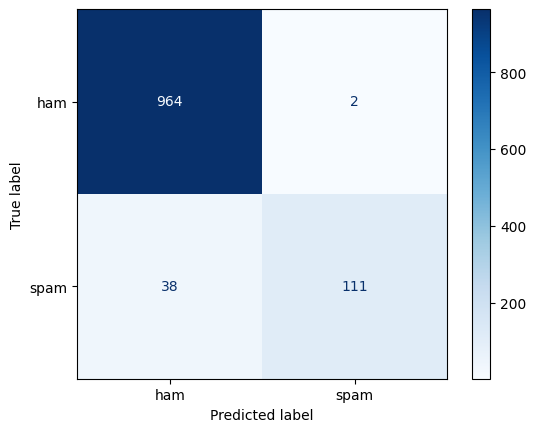

In [ ]:
from sklearn.naive_bayes import MultinomialNB

ground_truth_y, predicted_y, y_classes = simple_training_and_prediction(MultinomialNB())
evaluate_model(ground_truth_y, predicted_y, y_classes)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

cross_validation_and_scores(MultinomialNB())

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extr

Recall macro promedio:  0.8847298975994627
F1 macro promedio:  0.924921768732362
Precision macro promedio:  0.9812276737195214


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Classification report:
               precision    recall  f1-score   support

         ham       0.98      0.99      0.99       966
        spam       0.95      0.85      0.90       149

    accuracy                           0.97      1115
   macro avg       0.97      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Confusion matrix:


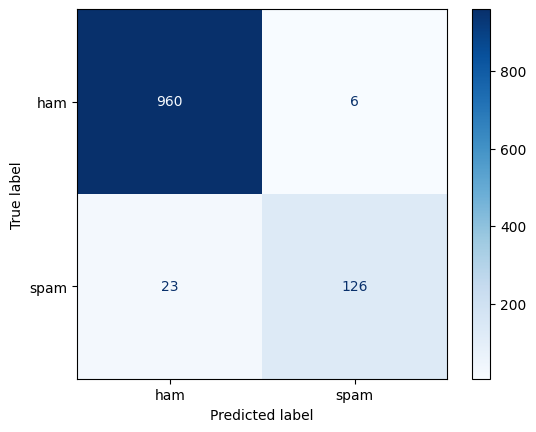

In [ ]:
from sklearn.svm import SVC

ground_truth_y, predicted_y, y_classes = simple_training_and_prediction(SVC(random_state=42))
evaluate_model(ground_truth_y, predicted_y, y_classes)

In [ ]:
from sklearn.svm import SVC

cross_validation_and_scores(SVC(random_state=42))

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extr

Recall macro promedio:  0.9341845810140956
F1 macro promedio:  0.9566955047646468
Precision macro promedio:  0.9834668015615998


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Classification report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       0.96      0.72      0.83       149

    accuracy                           0.96      1115
   macro avg       0.96      0.86      0.90      1115
weighted avg       0.96      0.96      0.96      1115

Confusion matrix:


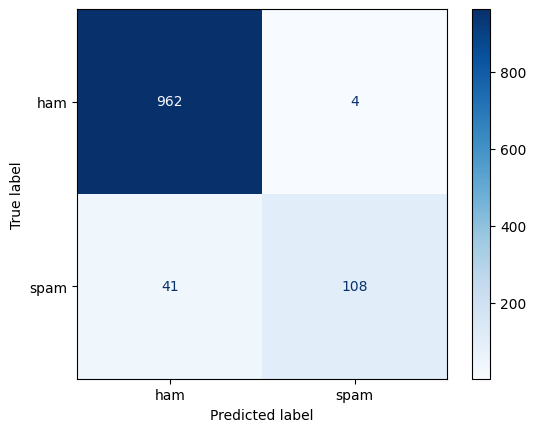

In [ ]:
from sklearn.linear_model import LogisticRegression

ground_truth_y, predicted_y, y_classes = simple_training_and_prediction(LogisticRegression(random_state=42))
evaluate_model(ground_truth_y, predicted_y, y_classes)

In [ ]:
from sklearn.linear_model import LogisticRegression

cross_validation_and_scores(LogisticRegression(random_state=42))

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extr

Recall macro promedio:  0.8768961248560745
F1 macro promedio:  0.9178534073252598
Precision macro promedio:  0.9756410355390853


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Classification report:
               precision    recall  f1-score   support

         ham       0.97      0.99      0.98       966
        spam       0.93      0.81      0.86       149

    accuracy                           0.97      1115
   macro avg       0.95      0.90      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Confusion matrix:


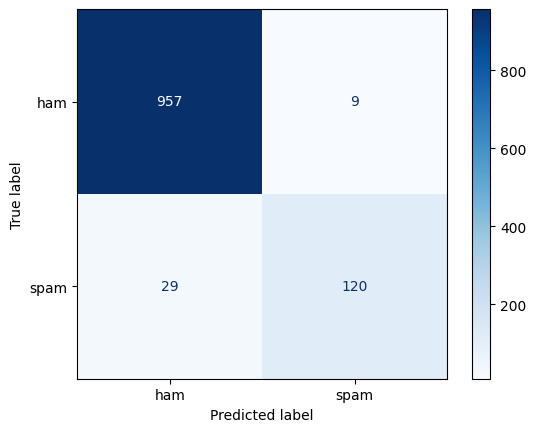

In [ ]:
from sklearn.tree import DecisionTreeClassifier

ground_truth_y, predicted_y, y_classes = simple_training_and_prediction(DecisionTreeClassifier(random_state=42))
evaluate_model(ground_truth_y, predicted_y, y_classes)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

cross_validation_and_scores(DecisionTreeClassifier(random_state=42))

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extr

Recall macro promedio:  0.9275877005584745
F1 macro promedio:  0.9318187712252703
Precision macro promedio:  0.9380124073824222


f) Los clasificadores obtenidos pueden ser utilizados en el futuro en una aplicación real de mensajería, donde al llegar un mensaje a la casilla del usuario, sean filtrados en base a si son o no spam, como ya hacen muchas aplicaciones. Lógicamente el usuario no tendría intervención en este caso (a diferencia del ejemplo que se dio con el dataset de pingüinos donde él mismo carga los datos y se lleva a cabo la predicción), sino que desde el backend mismo se realiza esto de manera automática.